In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

In [2]:
from utils_plotting import recall_plots

# Parameters and Initialization

In [3]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [4]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(
    N_inp, N_bar, num_states,
    narrow_search_factor=0., wide_search_factor=1.5
    )

In [5]:
cache_states = [20, 35, 70]

# Example Narrow/Broad Recall

In [6]:
identification_s = 0.0

Now I just cached at location: 20
(100,)


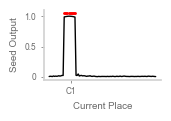

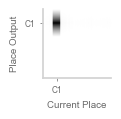

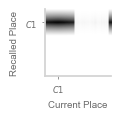

Now I just cached at location: 35
(100,)


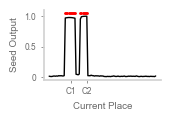

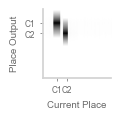

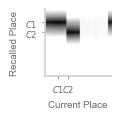

Now I just cached at location: 70
(100,)


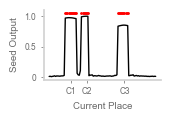

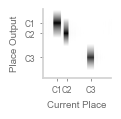

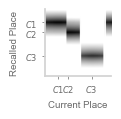

In [7]:
model.reset()

cache_identification = []
narrow_recall = []
wide_recall = []

for c_idx, cache_state in enumerate(cache_states):
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])

    _, _, outputs, _ = model.run_recall(identification_s, place_inputs)
    _cache_identification = outputs[1].squeeze()
    print(_cache_identification.shape)
    cache_identification.append(_cache_identification.copy())
    
    _, _, outputs, _ = model.run_narrow_recall(place_inputs)
    _narrow_recall = relu(outputs[0])
    narrow_recall.append(_narrow_recall.copy())
    
    _, _, outputs, _ = model.run_wide_recall(place_inputs)
    _wide_recall = relu(outputs[0])
    wide_recall.append(_wide_recall.copy())

    recall_plots(
        _cache_identification, _narrow_recall, _wide_recall,
        cache_states[:c_idx+1], fignum=4, save_name=f'C{c_idx+1}'
        )